In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools


compute_dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")
compute_dataset.head()

storage_dataset = pd.read_csv("../data/logfile-storage-v4.csv", delimiter=";")
storage_dataset.head()

network_dataset = pd.read_csv("../data/logfile-network-v4.csv", delimiter=";")
network_dataset.head()
labels = np.unique(compute_dataset['datacenter_name'])

/tmp/ipykernel_596967/1136695272.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  compute_dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")


### Current Network Traffic

Switch ID'0' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'1' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'2' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'3' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'4' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'5' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'6' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'7' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'8' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'9' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'10' at datacenter 'Datacenter_1' has used 4000.0 due to 4 sources of traffic.
Switch ID'11' at datacenter 'Datacenter_1'

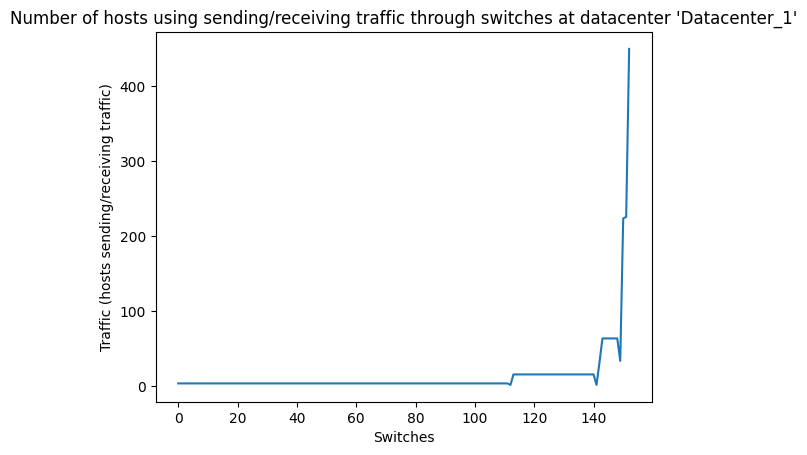

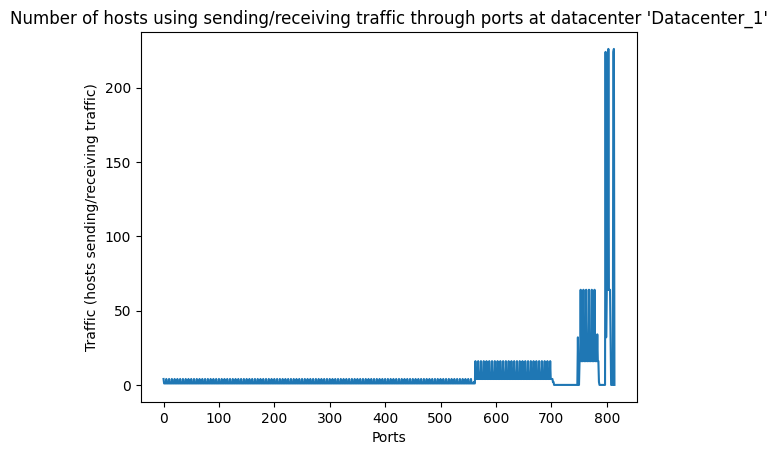

Switch ID'0' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'1' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'2' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'3' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'4' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'5' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'6' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'7' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'8' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'9' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'10' at datacenter 'Datacenter_2' has used 4000.0 due to 4 sources of traffic.
Switch ID'11' at datacenter 'Datacenter_2'

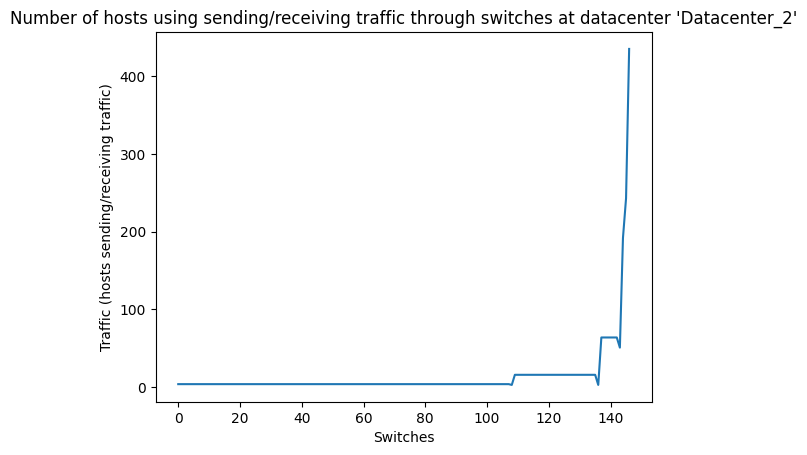

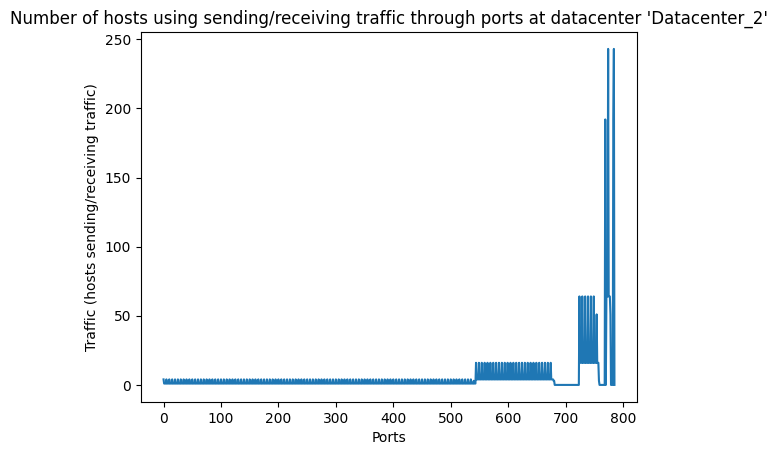

Switch ID'0' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'1' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'2' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'3' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'4' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'5' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'6' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'7' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'8' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'9' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'10' at datacenter 'Datacenter_3' has used 4000.0 due to 4 sources of traffic.
Switch ID'11' at datacenter 'Datacenter_3'

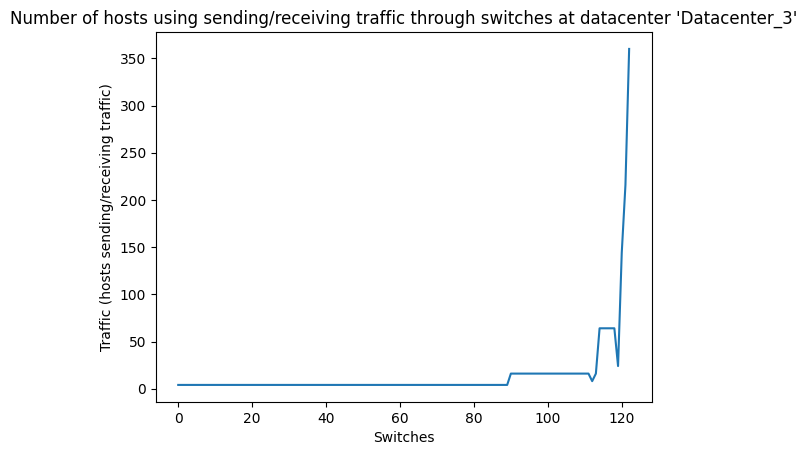

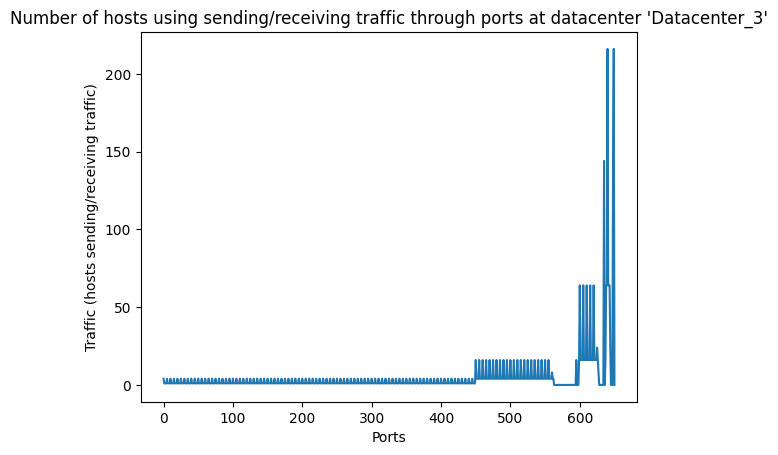

Switch ID'0' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'1' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'2' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'3' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'4' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'5' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'6' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'7' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'8' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'9' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'10' at datacenter 'Datacenter_4' has used 4000.0 due to 4 sources of traffic.
Switch ID'11' at datacenter 'Datacenter_4'

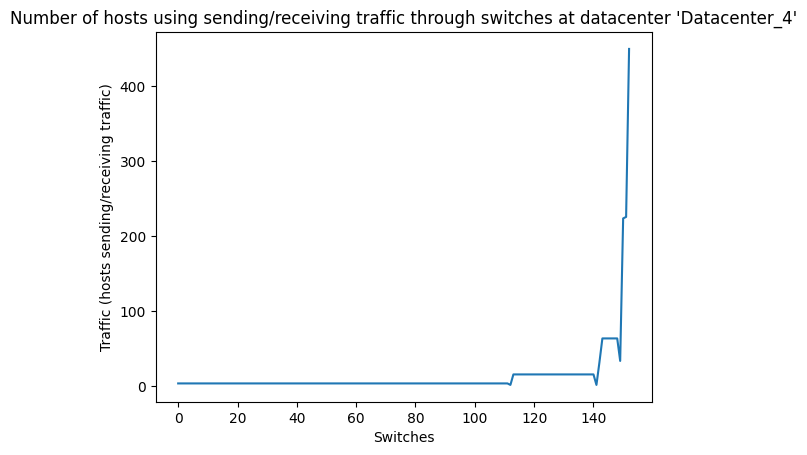

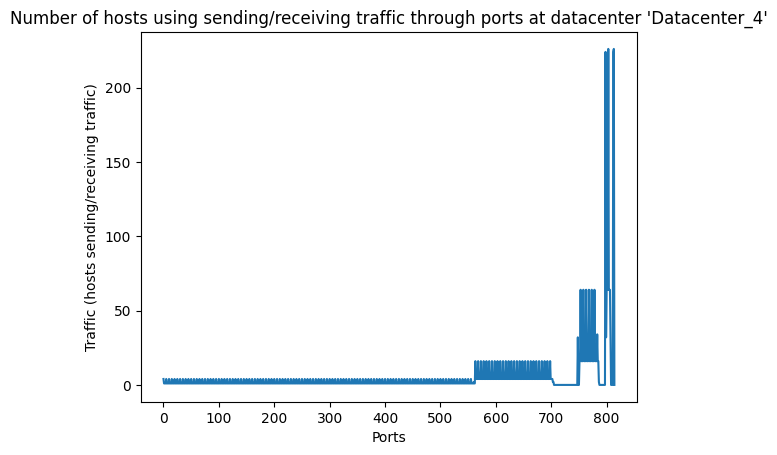

2250.0 network traffic sources at datacenter 'Datacenter_1'.
2175.0 network traffic sources at datacenter 'Datacenter_2'.
1800.0 network traffic sources at datacenter 'Datacenter_3'.
2250.0 network traffic sources at datacenter 'Datacenter_4'.
The cloud provider has 8475.0 sources of network traffic.
Cloud provider has 0 powered down switches, and 0 powered down ports.


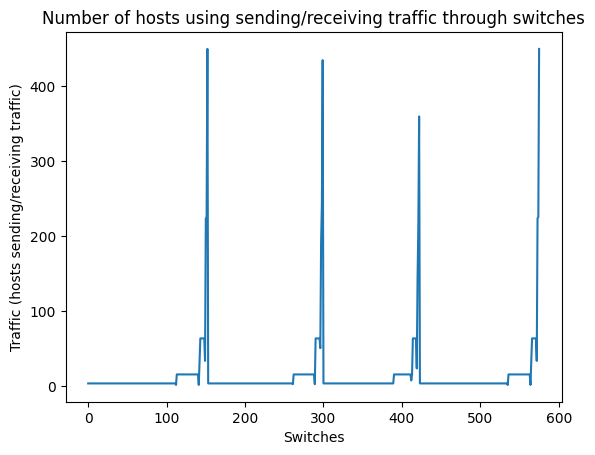

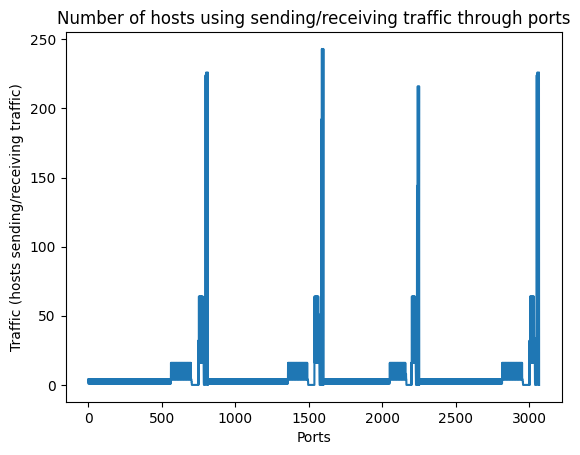

In [13]:
used_bandwidth_per_datacenter = np.array([])
used_bandwidth_per_switch = np.array([])
used_bandwidth_per_port = np.array([])

traffic_per_datacenter = np.array([])
traffic_per_switch = np.array([])
traffic_per_port = np.array([])

num_powered_down_switches = 0
num_powered_down_ports = 0
for datacenter_name in labels:
    used_bandwidth_per_datacenter_per_switch = np.array([])
    traffic_per_datacenter_per_switch = np.array([])
    
    used_bandwidth_per_datacenter_per_port = np.array([])
    traffic_per_datacenter_per_port = np.array([])
    
    for index, sample in network_dataset[network_dataset['datacenter_name'] == datacenter_name].iterrows():
        if sample['is_active'] == False:
            num_powered_down_switches += 1
        
        if pd.notna(sample['traffic_history']):
            switch_traffic = len(sample['traffic_history'].split(":")) - 1
            print(f"Switch ID'{sample['id']}' at datacenter '{sample['datacenter_name']}' has used {sample['total_used_bandwidth']} due to {switch_traffic} sources of traffic.")
            used_bandwidth_per_datacenter_per_switch = np.append(used_bandwidth_per_datacenter_per_switch, float(sample['total_used_bandwidth']))
            used_bandwidth_per_switch = np.append(used_bandwidth_per_switch, float(sample['total_used_bandwidth']))
            
            traffic_per_datacenter_per_switch = np.append(traffic_per_datacenter_per_switch, switch_traffic)
            traffic_per_switch = np.append(traffic_per_switch, switch_traffic)
        
        if pd.notna(sample['ports']):
            for port in sample['ports'].split(":"): # ports: id, is_active, active_duration, switch_id (tx), host_id (rx), bandwidth, total_used_bandwidth, traffic_history_port
                if port != "":
                    port_info = port.split(",")
                    
                    if port_info[1] == False:
                        num_powered_down_ports += 1
                    
                    port_traffic = len(port_info[7].split("-")) - 1
                    used_bandwidth_per_datacenter_per_port = np.append(used_bandwidth_per_datacenter_per_port, float(port_info[6]))
                    used_bandwidth_per_port = np.append(used_bandwidth_per_port, float(port_info[6]))
                    
                    traffic_per_datacenter_per_port = np.append(traffic_per_datacenter_per_port, port_traffic)
                    traffic_per_port = np.append(traffic_per_port, port_traffic)
    traffic_per_datacenter = np.append(traffic_per_datacenter, np.sum(traffic_per_datacenter_per_switch))
    used_bandwidth_per_datacenter = np.append(used_bandwidth_per_datacenter, np.sum(used_bandwidth_per_datacenter_per_switch))
    
    plt.plot(np.arange(len(traffic_per_datacenter_per_switch)), traffic_per_datacenter_per_switch, label="Traffic per switch")
    plt.xlabel("Switches")
    plt.ylabel("Traffic (hosts sending/receiving traffic)")
    plt.title(f"Number of hosts using sending/receiving traffic through switches at datacenter '{datacenter_name}'")
    #plt.legend()
    plt.show()


    plt.plot(np.arange(len(traffic_per_datacenter_per_port)), traffic_per_datacenter_per_port, label="Traffic per port")
    plt.xlabel("Ports")
    plt.ylabel("Traffic (hosts sending/receiving traffic)")
    plt.title(f"Number of hosts using sending/receiving traffic through ports at datacenter '{datacenter_name}'")
    #plt.legend()
    plt.show()

for i in range(len(labels)):
    print(f"{traffic_per_datacenter[i]} network traffic sources at datacenter '{labels[i]}'.")
print(f"The cloud provider has {sum(traffic_per_datacenter)} sources of network traffic.")

print(f"Cloud provider has {num_powered_down_switches} powered down switches, and {num_powered_down_ports} powered down ports.")

plt.plot(np.arange(len(traffic_per_switch)), traffic_per_switch, label="Traffic per switch")
plt.xlabel("Switches")
plt.ylabel("Traffic (hosts sending/receiving traffic)")
plt.title("Number of hosts using sending/receiving traffic through switches")
#plt.legend()
plt.show()


plt.plot(np.arange(len(traffic_per_port)), traffic_per_port, label="Traffic per port")
plt.xlabel("Ports")
plt.ylabel("Traffic (hosts sending/receiving traffic)")
plt.title("Number of hosts using sending/receiving traffic through ports")
#plt.legend()
plt.show()


Investigating the effect of network traffic on updated workload and data placement.

### Simple Placement

Simple Resource Aware Workload Placement 

In [14]:

vms = []
hosts = []
for index, sample in compute_dataset[compute_dataset['time'] == 300.01].iterrows():
    hosts.append({
        "id": sample['host_id'],
        "datacenter_name": sample['datacenter_name'],
        "active": sample['active'],
        "power_model": sample['power_model'].split(","),
        "pes": int(sample['number_of_pes']),
        "mips": float(sample['mips']),
        "used_mips": (float(sample['mips']) - float(sample['available_mips'])),
        "ram": float(sample['ram']),
        "used_ram": (float(sample['ram']) - float(sample['available_ram'])),
        "bw": float(sample['bw']),
        "used_bw": (float(sample['bw']) - float(sample['available_bw'])),
    })
    if pd.notna(sample['vms']):
        for index, vm in enumerate(sample['vms'].split(":")):
            vm_allocated_resources = vm.split(",")
            if len(vm_allocated_resources) != 4:
                continue
            vms.append({
                "id": index,
                "pes": int(vm_allocated_resources[0]),
                "mips": float(vm_allocated_resources[1]),
                "ram": float(vm_allocated_resources[2]),
                "bw": float(vm_allocated_resources[3])
            })

vms_copy = vms.copy()
new_workloads_placement = []
for index_host, host in enumerate(hosts):
    used_mips = 0
    used_ram = 0
    used_bw = 0
    workloads_per_host = []
    
    for index_vm, vm in enumerate(vms_copy):
        if ((vm['mips'] + used_mips) <= host['mips']) and ((vm['ram'] + used_ram) <= host['ram']) and ((vm['bw'] + used_bw) <= host['bw']):
            used_mips += vm['mips']
            used_ram += vm['ram']
            used_bw += vm['bw']
            workloads_per_host.append(vm)
    
    new_workloads_placement.append(workloads_per_host)
    for index_vm, vm in enumerate(workloads_per_host):
        run = True
        index = 0
        while run:
            if vm['id'] == vms_copy[index]['id']:
                del vms_copy[index]
                run = False
            index += 1

#### Simple Capacity Aware Disk Placement

In [15]:

disks = []
files = []
for i, sample in storage_dataset.iterrows():
    disks.append({
        "id": i,
        "datacenter": sample['datacenter_name'],
        "storage_capacity": float(sample['storage_capacity']),
        "capacity_used": float(sample['capacity_used']),
        "active_power": float(sample['active_power']),
        "idle_power": float(sample['idle_power'])

    })
    if pd.notna(sample['files']):
        for j, file in enumerate(sample['files'].split(":")):
            file_data = file.split(",")
            if len(file_data) != 3:
                continue
            files.append({
                "id": j,
                "filename": file_data[0],
                "filesize": float(file_data[1]),
                "transaction_time": float(file_data[2])
            })

files_copy = files.copy()
new_storage_placement = []
removed_files_from_copy = 0

for index_disk, disk in enumerate(disks):
    used_storage = 0
    files_per_disk = []
    for file in files_copy:
        if file['filesize'] + used_storage <= disk['storage_capacity']:
            used_storage += file['filesize']
            files_per_disk.append(file)
    
    # Adding to new list of placement of data and removing from the copy 
    new_storage_placement.append(files_per_disk)
    for index, file in enumerate(files_per_disk):
        run = True
        index = 0
        while run:
            if file['id'] == files_copy[index]['id']:
                del files_copy[index]
                run = False
            index += 1


#### The Resulting Network Infrastructure 

In [16]:
switches = []
datacenters_switches = []

num_current_shutdown_ports = 0
num_current_shutdown_switches = 0

num_current_could_shutdown_ports = 0
num_current_could_shutdown_switches = 0
# vms
# hosts

# Powering down ports and switches connected to unused hosts, switches
for datacenter_name in labels:
    switches_per_datacenter = []
    for index_switches, sample in network_dataset[network_dataset['datacenter_name'] == datacenter_name].iterrows():
        ports = []
        if sample['role'] == "access switch":
            could_shutdown = True
            if pd.notna(sample['ports']):
                for index_port, port in enumerate(sample['ports'].split(":")):
                    if index_port == 0:
                        pass
                    elif port != "" and index_port != 0:
                        port_info = port.split(",") # ports: id, is_active, active_duration, switch_id (tx), host_id (rx), bandwidth, total_used_bandwidth    
                        for host in hosts:
                            if (datacenter_name == host['datacenter_name']) and (int(port_info[4]) == host['id']):
                                ports.append({
                                    "port_id": int(port_info[0]),
                                    "is_active": bool(port_info[1]),
                                    "active_duration": float(port_info[2]),
                                    "switch_id": int(port_info[3]),
                                    "host_id": int(port_info[4]),
                                    "host": host,
                                    "bandwidth": float(port_info[5]),
                                    "total_used_bandwidth": float(port_info[6])
                                })
                                if bool(port_info[1]) == False:
                                    num_current_shutdown_ports += 1
                                else:
                                    could_shutdown = False
                                if float(port_info[6]) == 0:
                                    num_current_could_shutdown_ports += 1
                                else:
                                    could_shutdown = False
            access_switch = {
                "switch_id": sample['id'],
                "datacenter_id": sample['datacenter_id'],
                "datacenter_name": sample['datacenter_name'],
                "role": sample['role'],
                "level": sample['level'],
                "bandwidth": sample['bandwidth'],
                "total_used_bandwidth": sample['total_used_bandwidth'],
                "traffic_history": sample['traffic_history'],
                "ports": ports,
                "is_active": sample['is_active'],
                "duration": sample['duration'],
                "power_per_port": sample['power_per_port'],
                "low_power": sample['low_power'],
                "high_power": sample['high_power'],
            }
            switches.append(access_switch)
            switches_per_datacenter.append(access_switch)
            
            if sample['is_active'] == False:
                num_current_shutdown_switches += 1
            if could_shutdown:
                num_current_could_shutdown_switches += 1
            
        elif sample['role'] == "distribution switch":
            could_shutdown = True
            if pd.notna(sample['ports']):
                for index_port, port in enumerate(sample['ports'].split(":")):
                    if index_port == 0:
                        pass
                    elif port != "" and index_port != 0:
                        port_info = port.split(",") # ports: id, is_active, active_duration, switch_id (tx), host_id (rx), bandwidth, total_used_bandwidth    
                        for switch in switches:
                            if (datacenter_name == switch['datacenter_name']) and (int(port_info[4]) == switch['switch_id']):
                                ports.append({
                                    "port_id": int(port_info[0]),
                                    "is_active": bool(port_info[1]),
                                    "active_duration": float(port_info[2]),
                                    "switch_current_level_id": int(port_info[3]),
                                    "switch_lower_level_id": int(port_info[4]),
                                    "switch": switch,
                                    "bandwidth": float(port_info[5]),
                                    "total_used_bandwidth":float (port_info[6])
                                })
                                if bool(port_info[1]) == False:
                                    num_current_shutdown_ports += 1
                                else:
                                    could_shutdown = False
                                if float(port_info[6]) == 0:
                                    num_current_could_shutdown_ports += 1
                                else:
                                    could_shutdown = False
            distribution_switch = {
                "switch_id": sample['id'],
                "datacenter_id": sample['datacenter_id'],
                "datacenter_name": sample['datacenter_name'],
                "role": sample['role'],
                "level": sample['level'],
                "bandwidth": sample['bandwidth'],
                "total_used_bandwidth": sample['total_used_bandwidth'],
                "traffic_history": sample['traffic_history'],
                "ports": ports,
                "is_active": sample['is_active'],
                "duration": sample['duration'],
                "power_per_port": sample['power_per_port'],
                "low_power": sample['low_power'],
                "high_power": sample['high_power'],
            }
            switches.append(distribution_switch)
            switches_per_datacenter.append(distribution_switch)
            
            if sample['is_active'] == False:
                num_current_shutdown_switches += 1
            if could_shutdown:
                num_current_could_shutdown_switches += 1
        elif sample['role'] == "core switch":
            could_shutdown = True
            if pd.notna(sample['ports']):
                for index_port, port in enumerate(sample['ports'].split(":")):
                    if port != "":
                        port_info = port.split(",") # ports: id, is_active, active_duration, switch_id (tx), host_id (rx), bandwidth, total_used_bandwidth    
                        for switch in switches:
                            if (datacenter_name == switch['datacenter_name']) and (int(port_info[4]) == switch['switch_id']):
                                ports.append({
                                    "port_id": int(port_info[0]),
                                    "is_active": bool(port_info[1]),
                                    "active_duration": float(port_info[2]),
                                    "switch_current_level_id": int(port_info[3]),
                                    "switch_lower_level_id": int(port_info[4]),
                                    "switch": switch,
                                    "bandwidth": float(port_info[5]),
                                    "total_used_bandwidth":float (port_info[6])
                                })
                                if bool(port_info[1]) == False:
                                    num_current_shutdown_ports += 1
                                else:
                                    could_shutdown = False
                                if float(port_info[6]) == 0:
                                    num_current_could_shutdown_ports += 1
                                else:
                                    could_shutdown = False
            core_switch = {
                "switch_id": sample['id'],
                "datacenter_id": sample['datacenter_id'],
                "datacenter_name": sample['datacenter_name'],
                "role": sample['role'],
                "level": sample['level'],
                "bandwidth": sample['bandwidth'],
                "total_used_bandwidth": sample['total_used_bandwidth'],
                "traffic_history": sample['traffic_history'],
                "ports": ports,
                "is_active": sample['is_active'],
                "duration": sample['duration'],
                "power_per_port": sample['power_per_port'],
                "low_power": sample['low_power'],
                "high_power": sample['high_power'],
            }
            switches.append(core_switch)
            switches_per_datacenter.append(core_switch)
            
            if sample['is_active'] == False:
                num_current_shutdown_switches += 1
            if could_shutdown:
                num_current_could_shutdown_switches += 1
    datacenters_switches.append(switches_per_datacenter)

In [17]:
# Powering down ports and switches connected to unused hosts and switches
num_new_shutdown_ports = 0
num_new_shutdown_switches = 0
datacenters_switches_copy = datacenters_switches.copy()
for index_datacenter, datacenter_switches in enumerate(datacenters_switches_copy):
    levels = 0
    for index_switch, switch in enumerate(datacenter_switches):
        if switch['role'] == "core switch":
            levels = switch['level']
    
    for level in range(levels):
        for index_switch, switch in enumerate(datacenter_switches):
            # First checking the corresponding effect of the resource aware placement of workloads
            # and for the capacity aware placement of data on the access switches
            if switch['role'] == "access switch":
                shutdown_switch = True
                for index_port, port in enumerate(switch['ports']):
                    if index_port != 0:
                        if port['host']['used_bw'] == 0:
                            port['is_active'] = False
                            num_new_shutdown_ports += 1
                        else:
                            port['is_active'] = True
                            shutdown_switch = False
                switch['is_active'] = shutdown_switch
                if shutdown_switch:
                    num_new_shutdown_switches += 1
            
            # Secondly checking the corresponding effect of the resource aware placement of workloads
            # and for the capacity aware placement of data on the distribution switches
            elif switch['role'] == "distribution switch" and switch['level'] == level:
                shutdown_switch = True
                for index_port, port in enumerate(switch['ports']):
                    if index_port != 0:
                        
                        if port['switch']['is_active'] == False:
                            port['is_active'] = False
                            num_new_shutdown_ports += 1
                        else:
                            port['is_active'] = True
                            shutdown_switch = False
                switch['is_active'] = shutdown_switch
                if shutdown_switch:
                    num_new_shutdown_switches += 1
            # Thirdly checking the corresponding effect of the resource aware placement of workloads
            # and for the capacity aware placement of data on the distribution switches
            elif switch['role'] == "core switch":
                shutdown_switch = True
                for index_port, port in enumerate(switch['ports']):
                    if port['switch']['is_active'] == False:
                        port['is_active'] = False
                        num_new_shutdown_ports += 1
                    else:
                        port['is_active'] = True
                        shutdown_switch = False # No network is being used
                switch['is_active'] = shutdown_switch
                if shutdown_switch:
                    num_new_shutdown_switches += 1

print("Number of port shutdowns with the previous placements:", num_current_shutdown_ports)
print("Number of possible ports to shutdown with the previous placements:", num_current_could_shutdown_ports)
print("Number of port shutdowns with the new placemenets:", num_new_shutdown_ports)

print("Number of switch shutdowns with the previous placements:", num_current_shutdown_switches)
print("Number of possible switch to shutdown with the previous placements:", num_current_could_shutdown_switches)
print("Number of switch shutdowns with the new placemenets:", num_new_shutdown_switches)

Number of port shutdowns with the previous placements: 0
Number of possible ports to shutdown with the previous placements: 187
Number of port shutdowns with the new placemenets: 394
Number of switch shutdowns with the previous placements: 0
Number of possible switch to shutdown with the previous placements: 0
Number of switch shutdowns with the new placemenets: 125


### Re-organizing Placement

### Optimal Placement

### Combining methods